In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_set = pd.read_csv(r"C:\Users\91966\Downloads\supermarket sales.zip")
raw_set.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

# basic level

### 1.	Load the dataset and check the shape, columns, and data types.

In [3]:
raw_set.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
raw_set.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
raw_set.shape

(1000, 17)

In [6]:
raw_set.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### 2.	Display the first 10 rows and last 10 rows.

In [7]:
print(raw_set.head(10))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22

In [8]:
print(raw_set.tail(10))

      Invoice ID Branch       City Customer type  Gender  \
990  886-18-2897      A     Yangon        Normal  Female   
991  602-16-6955      B   Mandalay        Normal  Female   
992  745-74-0715      A     Yangon        Normal    Male   
993  690-01-6631      B   Mandalay        Normal    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
990      Food and beverages       56.56         5  14.1400   296.9400   
991       Sports and travel       76.60        10  38.3000   804.3000   
992  Electronic accessories       58.03         2   5.8030   121.8630   
993     Fashion accessories       17.49        

### 3.	Check for missing values and duplicates.

In [9]:
missing_values = raw_set.isnull().sum()
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
duplicated = raw_set.duplicated().sum()
duplicated

0

### 4.	Convert the Date column to datetime format.

In [11]:
df = raw_set
df['Date'] = pd.to_datetime(df['Date'] , errors = 'coerce')
df['Date'].head()


0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

### 5.	Select only these columns: Branch, City, Product line, Quantity, Total.

In [12]:
df1 = df[['Branch','City','Product line','Quantity','Total']]
df1

,Branch,City,Product line,Quantity,Total
0,A,Yangon,Health and beauty,7,548.9715
1,C,Naypyitaw,Electronic accessories,5,80.2200
2,A,Yangon,Home and lifestyle,7,340.5255
3,A,Yangon,Health and beauty,8,489.0480
4,A,Yangon,Sports and travel,7,634.3785
...,...,...,...,...,...
995,C,Naypyitaw,Health and beauty,1,42.3675
996,B,Mandalay,Home and lifestyle,10,1022.4900
997,A,Yangon,Food and beverages,1,33.4320
998,A,Yangon,Home and lifestyle,1,69.1110


### 6.	Filter rows where City is “Yangon”.

In [55]:
yangon_city = df1[df1['City']=='Yangon']
Yangon_stats = yangon_city.groupby('Product line')['Total'].sum()
Yangon_stats

Product line
Electronic accessories    18317.1135
Fashion accessories       16332.5085
Food and beverages        17163.1005
Health and beauty         12597.7530
Home and lifestyle        22417.1955
Sports and travel         19372.6995
Name: Total, dtype: float64

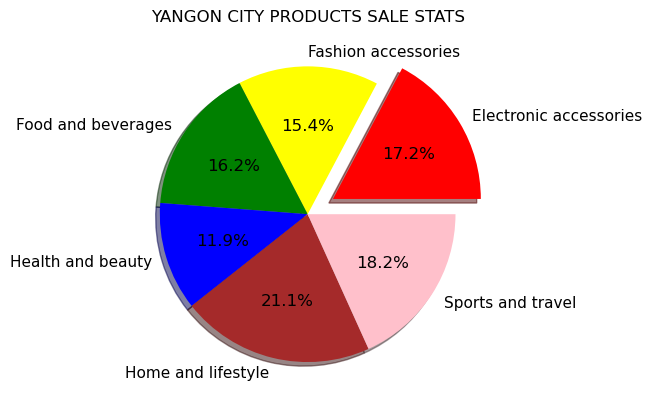

In [56]:
plt.title('YANGON CITY PRODUCTS SALE STATS')
plt.pie(
    Yangon_stats, 
    labels=Yangon_stats.index, 
    autopct="%1.1f%%", 
    colors = ['red', 'yellow', 'green', 'blue', 'brown', 'pink'],
    shadow = True,
    explode = [0.2,0,0,0,0,0]
)
plt.show()

### 7.	Sort the dataset by Total in descending order.

In [22]:
sorted_1 = df1.sort_values('Total',ascending = False)
sorted_1

,Branch,City,Product line,Quantity,Total
350,C,Naypyitaw,Fashion accessories,10,1042.6500
167,A,Yangon,Fashion accessories,10,1039.2900
557,C,Naypyitaw,Food and beverages,10,1034.4600
699,C,Naypyitaw,Home and lifestyle,10,1023.7500
996,B,Mandalay,Home and lifestyle,10,1022.4900
...,...,...,...,...,...
402,C,Naypyitaw,Home and lifestyle,1,14.6790
443,C,Naypyitaw,Fashion accessories,1,13.4190
223,C,Naypyitaw,Fashion accessories,1,13.1670
629,A,Yangon,Fashion accessories,1,12.6945


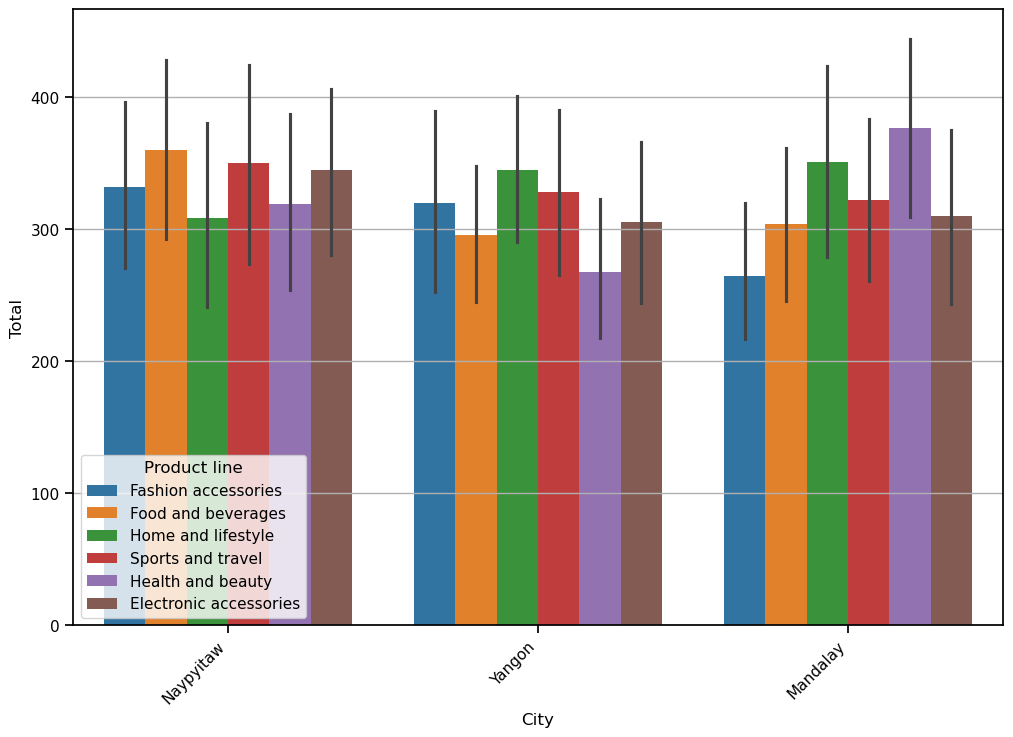

In [60]:
plt.figure(figsize = (12,8))
sns.set_context('notebook')
plt.grid()
sns.barplot(data = sorted_1, hue = 'Product line', y = 'Total',x = 'City')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### 8.	Select rows where Product line is “Health and beauty” and Quantity > 5.

In [15]:
df1[(df1['Product line'] == 'Health and beauty') & (df1['Quantity'] > 5)]

,Branch,City,Product line,Quantity,Total
0,A,Yangon,Health and beauty,7,548.9715
3,A,Yangon,Health and beauty,8,489.0480
14,A,Yangon,Health and beauty,10,749.4900
16,A,Yangon,Health and beauty,7,506.6355
29,A,Yangon,Health and beauty,9,235.2105
...,...,...,...,...,...
936,C,Naypyitaw,Health and beauty,7,579.8415
944,A,Yangon,Health and beauty,7,74.0880
983,C,Naypyitaw,Health and beauty,7,734.7060
987,B,Mandalay,Health and beauty,8,520.8000


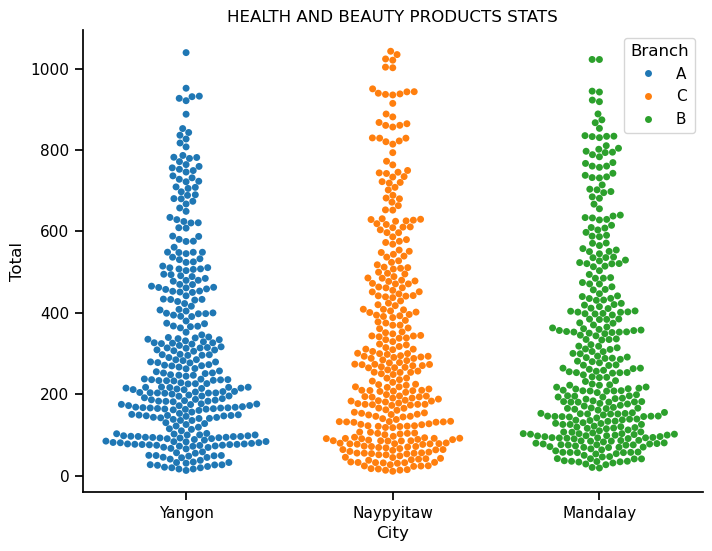

In [19]:
plt.figure(figsize = (8,6))
sns.swarmplot(data = df1, x = 'City', y = 'Total', hue = 'Branch')
sns.set_context('notebook')
plt.title('HEALTH AND BEAUTY PRODUCTS STATS')
sns.despine()


# Intermediate Tasks (Aggregation & New Columns)

### 9.	Add a new column Profit = Total - cogs.

In [63]:
updated_set = raw_set
raw_set['Profit'] = raw_set['Total'] - raw_set['cogs']
print(raw_set.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Profit'],
      dtype='object')


### 10.	Calculate total sales (Total) for each Branch.

In [78]:
branch_group = raw_set.groupby(['City','Branch','Product line'])[['Profit', 'gross income']].sum()
branch_group= branch_group.reset_index()
branch_group

,City,Branch,Product line,Profit,gross income
0,Mandalay,B,Electronic accessories,811.9735,811.9735
1,Mandalay,B,Fashion accessories,781.5865,781.5865
2,Mandalay,B,Food and beverages,724.5185,724.5185
3,Mandalay,B,Health and beauty,951.4600,951.4600
4,Mandalay,B,Home and lifestyle,835.6745,835.6745
5,Mandalay,B,Sports and travel,951.8190,951.8190
6,Naypyitaw,C,Electronic accessories,903.2845,903.2845
7,Naypyitaw,C,Fashion accessories,1026.6700,1026.6700
8,Naypyitaw,C,Food and beverages,1131.7550,1131.7550
9,Naypyitaw,C,Health and beauty,791.2060,791.2060


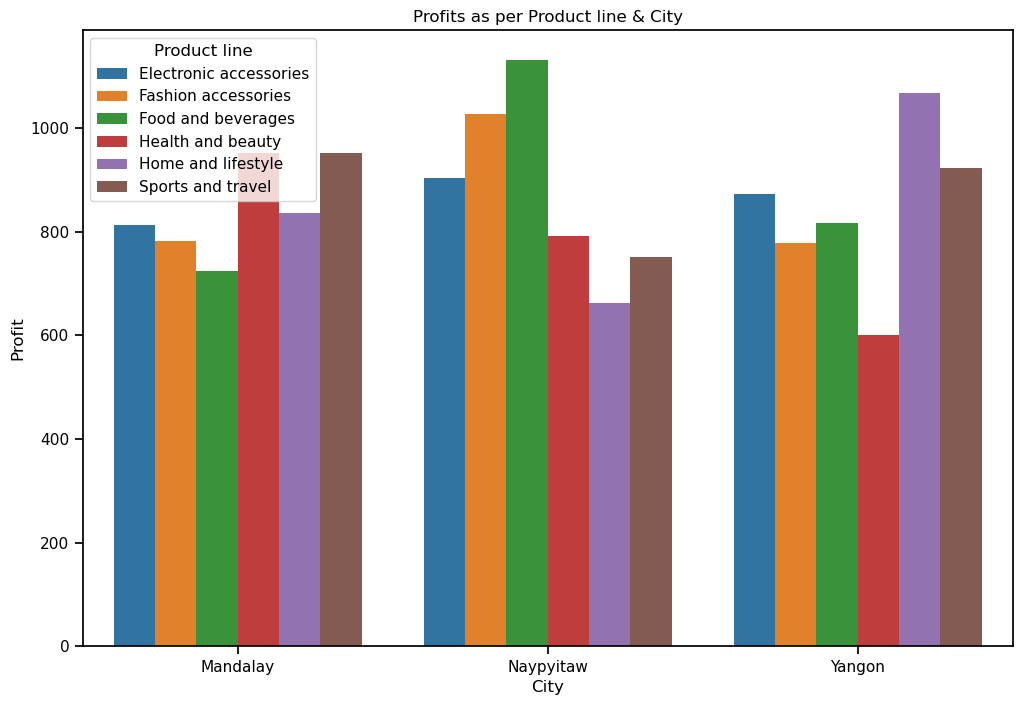

In [153]:
plt.figure(figsize=(12,8))
plt.title('Profits as per Product line & City')
sns.barplot(data = branch_group, x = 'City', y = 'Profit', hue = 'Product line')
plt.show()

### 11.	Calculate average Rating per Product line.

In [98]:
avg_product_line = raw_set.groupby('Product line')['Rating'].agg('mean')
avg_product_line = avg_product_line.reset_index()

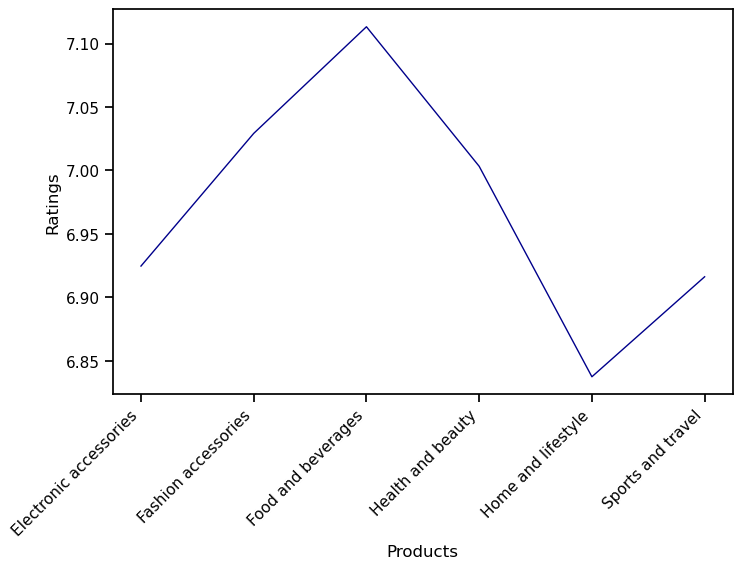

In [108]:
plt.figure(figsize = (8,5))
sns.set_context('notebook')
plt.plot(avg_product_line['Product line'],avg_product_line['Rating'],color = 'darkblue', linewidth = '1', markersize = 2)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Ratings')
plt.xlabel('Products')
plt.show()

### 12.	Count number of invoices per Branch.

In [110]:
invoices_branch = raw_set.groupby('Branch')['Invoice ID'].nunique()
invoices_branch = invoices_branch.reset_index()
invoices_branch

,Branch,Invoice ID
0,A,340
1,B,332
2,C,328


### 13.	Find the most common Payment method.

In [111]:
most_common_pays = raw_set['Payment'].value_counts()
most_common_pays.reset_index()
most_common_pays

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

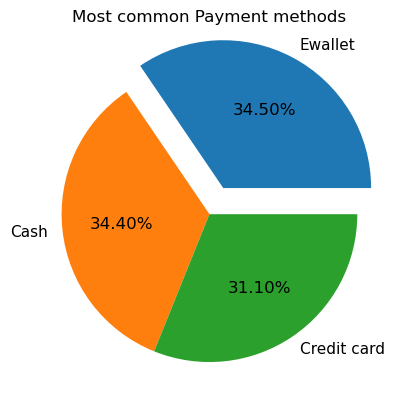

In [116]:
plt.pie(most_common_pays, labels = most_common_pays.index, autopct = '%1.2f%%', explode = (0.2,0,0))
plt.title('Most common Payment methods')
plt.show()

In [117]:
# most common payment :
most_common_pays_2 = raw_set['Payment'].mode()
print(most_common_pays_2)

0    Ewallet
Name: Payment, dtype: object


### 14.	Group by City and find the sum of Total and average Profit.

In [119]:
city_group_dt = raw_set.groupby('City').agg({ 'Total' : 'sum', 'Profit' : 'mean'})
city_group_dt = city_group_dt.reset_index()
city_group_dt

,City,Total,Profit
0,Mandalay,106197.6720,15.232024
1,Naypyitaw,110568.7065,16.052367
2,Yangon,106200.3705,14.874001


### 15.	Find which Product line generated the highest total sales.

In [122]:
sales_by_products = raw_set.groupby('Product line')['Total'].sum() # add all values of each grouped product line in the column
top_products = sales_by_products.sort_values(ascending = False)

top_products = top_products.reset_index()
top_products

,Product line,Total
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
5,Health and beauty,49193.7390


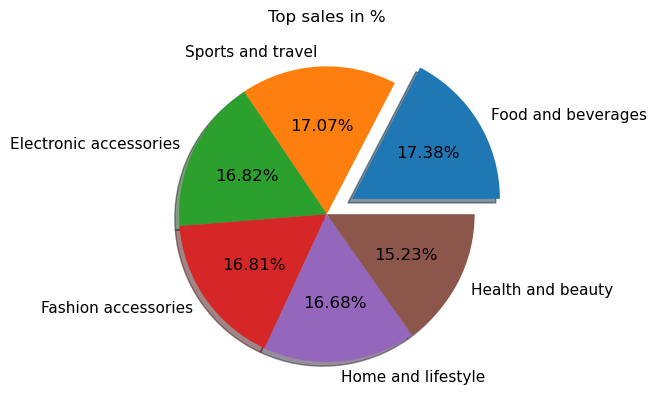

In [127]:
plt.pie(top_products['Total'], labels = top_products['Product line'], autopct = '%1.2f%%', shadow = True, explode = (0.2, 0,0,0,0,0))
plt.title('Top sales in %')
plt.show()

In [128]:
print(top_products.idxmax(), top_products.max())

Product line    1
Total           0
dtype: int64 Product line    Sports and travel
Total                   56144.844
dtype: object


### 16.	Find the total quantity sold per product line.

In [130]:
top_qty_products_sold = raw_set.groupby('Product line')['Quantity'].sum()
top_qty = top_qty_products_sold.sort_values(ascending = False)
top_qty.reset_index()
print(top_qty)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


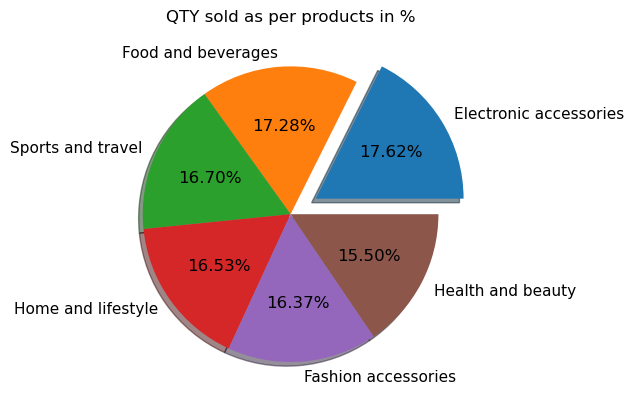

In [133]:
plt.pie(top_qty, labels = top_qty.index, autopct = '%1.2f%%', shadow = True, explode = (0.2, 0,0,0,0,0))
plt.title('QTY sold as per products in %')
plt.show()

In [26]:
print(top_qty.idxmax(), top_qty.max())

Electronic accessories 971


# Advanced Tasks (Grouping, Pivoting, Sorting)

### 17.	Find monthly sales trend (sum of Total per month using .groupby() and .dt.month).

In [145]:
import matplotlib.pyplot as plt
raw_set['Date'] = pd.to_datetime(raw_set['Date'], errors = 'coerce')
raw_set['Month'] = raw_set['Date'].dt.month_name()
sales_trend = raw_set.groupby('Month')['Total'].sum().reset_index()
a = sales_trend.sort_values(by = 'Total')
a.set_index('Month')





,Total
Month,
February,97219.374
March,109455.507
January,116291.868


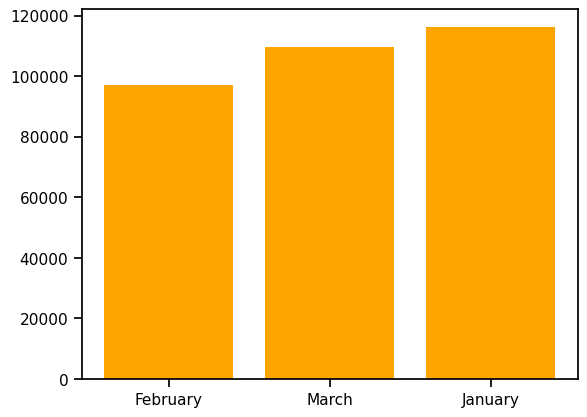

In [150]:
plt.bar(a['Month'], a['Total'], color = 'orange')
sns.set_context('notebook')
plt.show()

### 18.	Find which Branch had the highest total sales in each city.

In [28]:
branch_city = raw_set.groupby(['Branch','City'])['Total'].sum()
top_sales_branch = branch_city.sort_values(ascending = False)
print(top_sales_branch)

Branch  City     
C       Naypyitaw    110568.7065
A       Yangon       106200.3705
B       Mandalay     106197.6720
Name: Total, dtype: float64


In [29]:
branch_city.groupby('City').idxmax()
print(branch_city)

Branch  City     
A       Yangon       106200.3705
B       Mandalay     106197.6720
C       Naypyitaw    110568.7065
Name: Total, dtype: float64


### 19.	Create a pivot table: Product line vs Branch showing sum of Total.

In [161]:
pivot_1 = pd.pivot_table(raw_set, values = 'Total', index = 'Product line', columns = 'Branch', aggfunc = 'sum')
pivot_long = pivot_1.reset_index().melt(id_vars='Product line', 
                                        value_vars=['A','B','C'], 
                                        var_name='Branch', 
                                        value_name='Total')
pivot_long

,Product line,Branch,Total
0,Electronic accessories,A,18317.1135
1,Fashion accessories,A,16332.5085
2,Food and beverages,A,17163.1005
3,Health and beauty,A,12597.7530
4,Home and lifestyle,A,22417.1955
5,Sports and travel,A,19372.6995
6,Electronic accessories,B,17051.4435
7,Fashion accessories,B,16413.3165
8,Food and beverages,B,15214.8885
9,Health and beauty,B,19980.6600


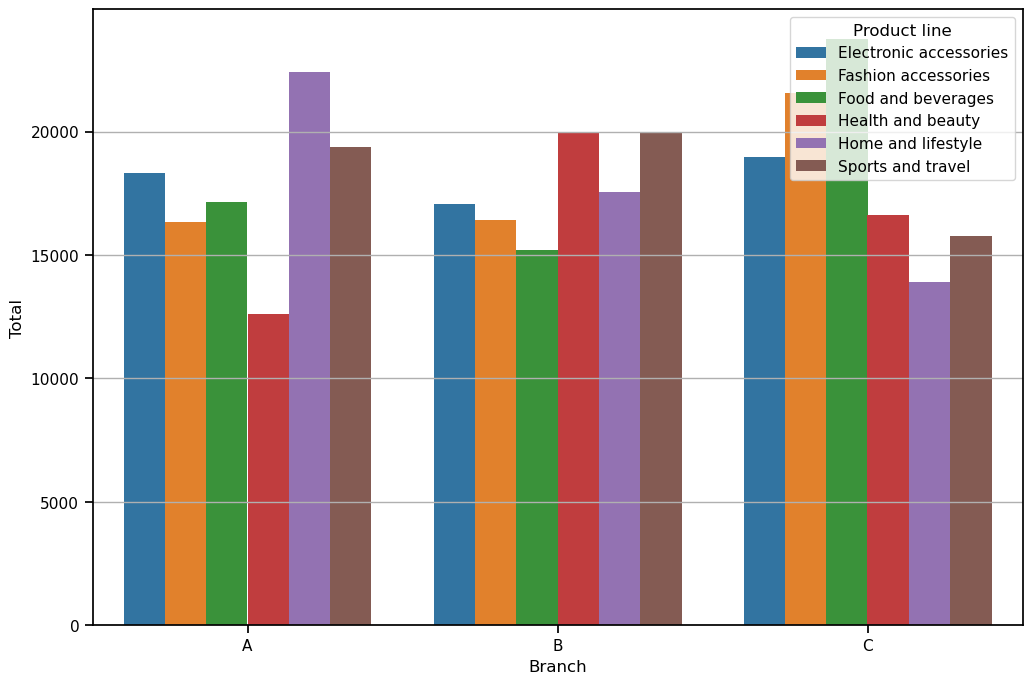

In [165]:
plt.figure(figsize = (12,8))
sns.set_context('notebook')
plt.grid()
sns.barplot(data = pivot_long, hue = 'Product line', y = 'Total',x = 'Branch')

plt.show()

### 20.	Find top 5 invoices with the highest Total.

In [166]:
high_invoices = raw_set.groupby('Invoice ID')['Total'].sum()
top_5_invoices = high_invoices.sort_values(ascending = False).head()
print(top_5_invoices)

Invoice ID
860-79-0874    1042.65
687-47-8271    1039.29
283-26-5248    1034.46
751-41-9720    1023.75
303-96-2227    1022.49
Name: Total, dtype: float64


### 21.	Find correlation between Rating and Total.

In [167]:
correlation = raw_set[['Rating','Total']].corr()
print(correlation)

          Rating     Total
Rating  1.000000 -0.036442
Total  -0.036442  1.000000


### 22.	Find average Unit price per Product line.

In [171]:
avg_unit_product = raw_set.groupby('Product line')['Unit price'].mean()
avg_unit_product = pd.DataFrame(avg_unit_product)
avg_unit_product

,Unit price
Product line,
Electronic accessories,53.551588
Fashion accessories,57.153652
Food and beverages,56.008851
Health and beauty,54.854474
Home and lifestyle,55.316937
Sports and travel,56.993253


### 23.	Find Product line with the maximum Profit per Branch.

In [172]:
max_profit_branch = pd.pivot_table(raw_set, values = 'Profit', index = 'Product line', columns = 'Branch', aggfunc = 'sum')
print(max_profit_branch)

Branch                          A         B          C
Product line                                          
Electronic accessories   872.2435  811.9735   903.2845
Fashion accessories      777.7385  781.5865  1026.6700
Food and beverages       817.2905  724.5185  1131.7550
Health and beauty        599.8930  951.4600   791.2060
Home and lifestyle      1067.4855  835.6745   661.6930
Sports and travel        922.5095  951.8190   750.5680


In [173]:
print(max_profit_branch.idxmax())

Branch
A    Home and lifestyle
B     Sports and travel
C    Food and beverages
dtype: object


In [174]:
# trying with .groupby()
max_profits = raw_set.groupby(['Product line','Branch'])['Profit'].sum()
top = max_profits.groupby('Branch').idxmax()
print(top)

Branch
A    (Home and lifestyle, A)
B     (Sports and travel, B)
C    (Food and beverages, C)
Name: Profit, dtype: object


### 24.	Count number of transactions per Payment method per Branch.

In [179]:
pay_methods = pd.pivot_table(raw_set, values = 'Total', index = 'Payment', columns = 'Branch', aggfunc = 'count')
payment_long = pay_methods.reset_index().melt(
    id_vars='Payment',
    value_vars=['A','B','C'],
    var_name='Branch',
    value_name='Count')
payment_long

,Payment,Branch,Count
0,Cash,A,110
1,Credit card,A,104
2,Ewallet,A,126
3,Cash,B,110
4,Credit card,B,109
5,Ewallet,B,113
6,Cash,C,124
7,Credit card,C,98
8,Ewallet,C,106


In [ ]:
sns.barplot(data = pay_methods,x = 'Branch', y  )